<a href="https://colab.research.google.com/github/AditiKanwar/IR-Project/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation on Retail Dataset**

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

Dataset is taken from  UCI Machine Learning repository, link for the same http://archive.ics.uci.edu/ml/datasets/online+retail

**Attribute Information:**

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.




In [ ]:
# loading dataset using pandas read method
dataset = pd.read_csv('/content/drive/MyDrive/retailDataset.csv', encoding = 'unicode_escape')

In [ ]:
dataset.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
dataset.Country.value_counts(ascending = False)
#we will keep values specific to one country so that we can focus on data targeting a specific country
#as observed UK has most number of records , we will keep UK and drop all others

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [ ]:
dataset = dataset.query('Country == "United Kingdom"').reset_index(drop = True)
#keeping UK and dropping others

In [ ]:
dataset.Country.unique()

array(['United Kingdom'], dtype=object)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495478 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      495478 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.2+ MB


In [ ]:
# check for null values if any in dataset
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [ ]:
# Since Description is a object datatype so we will fill with empty string
dataset.Description.fillna(" ")

# Also we ca't use mean or median method on Customer id as each person have its own unique Customer id so we will use
# the notnull function
dataset = dataset[pd.notnull(dataset.CustomerID)]

In [ ]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#As observed from above diagram the Quantity and Unit price have minimum value of 
#negative which is not possible so we will update them and make their minimum as 0.
dataset['Quantity'][dataset['Quantity'] < 0] = 0
dataset['UnitPrice'][dataset['UnitPrice'] < 0] = 0

In [ ]:
#converting the string date field to datetime, for recency calculation
dataset.InvoiceDate = pd.to_datetime(dataset.InvoiceDate)

#adding one more column
dataset['Amount'] = dataset['Quantity'] * dataset['UnitPrice']

In [ ]:
dataset.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


**RFM Modelling**

Recency is calulated as difference between Recent date and Last Invoice date (last purchase) 

Frequency is calculated as Unique values of Invoice Number (Bills)

Monetary value is calucated from Amount spent by customer

In [ ]:
import datetime as dt # for calculating recency 

c_date = dt.datetime(2011, 12, 11) # as maximum date in dataset is 10/12/2011 so we will set our current date as 11/12/2011

# Now we will create RFM modeling score for each customer

rfmData = dataset.groupby('CustomerID').agg({
                        'InvoiceDate' : lambda x : (c_date - x.max()).days, 
                        'InvoiceNo' : lambda x : x.count(), 
                        'Amount' : lambda x : sum(x) })

# Now we will rename columns name to Recency, Frequency and Monetory
rfmData.rename(columns = {
                        'InvoiceDate' : 'Recency', 
                        'InvoiceNo' : 'Frequency', 
                        'Amount' : 'Monetary' }, inplace = True)

# Now we will use resetindex to make sure that indexes are continuos.
rfmData.reset_index(inplace = True)

In [ ]:
rfmData.head(5)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,77183.60
1,12747.0,3,103,4196.01
2,12748.0,1,4642,33719.73
3,12749.0,4,231,4090.88
4,12820.0,4,59,942.34


In [ ]:
rfmData.describe()

,CustomerID,Recency,Frequency,Monetary
count,3950.000000,3950.000000,3950.000000,3950.000000
mean,15562.029367,92.323038,91.614684,1850.225710
std,1576.848325,100.236848,220.557389,7456.097867
min,12346.000000,1.000000,1.000000,0.000000
25%,14208.250000,17.000000,17.000000,293.025000
50%,15571.500000,51.000000,41.000000,641.980000
75%,16913.750000,144.000000,101.000000,1566.127500
max,18287.000000,374.000000,7983.000000,259657.300000


**RFM Dataset Visulaization**


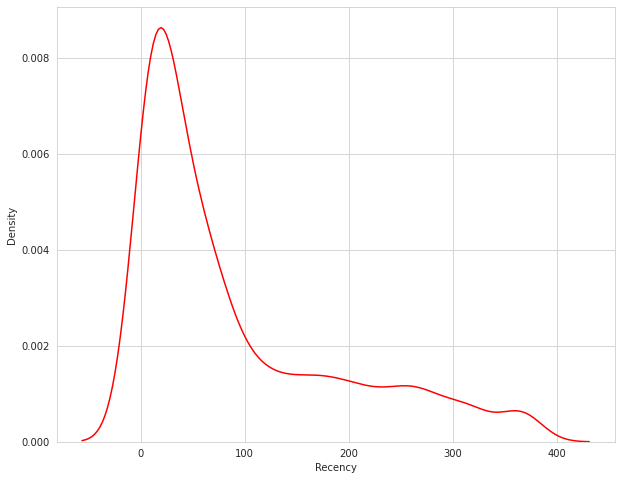

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 8))

# plotting  Recency 
sns.distplot(rfmData.Recency, hist = False, color = 'r')

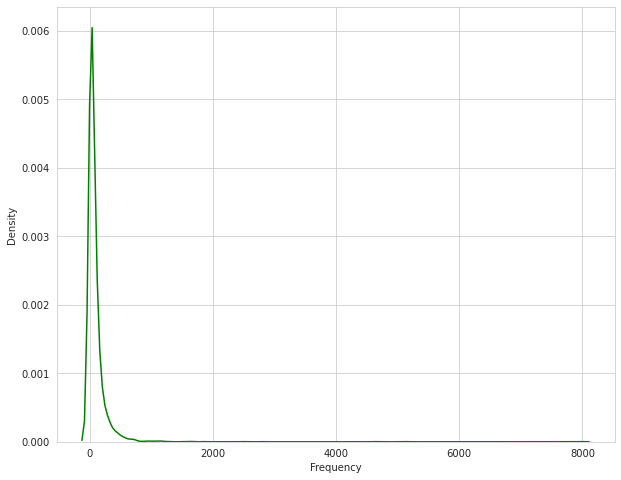

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 8))

# plotting Frequency 
sns.distplot(rfmData.Frequency, hist = False, color = 'g')

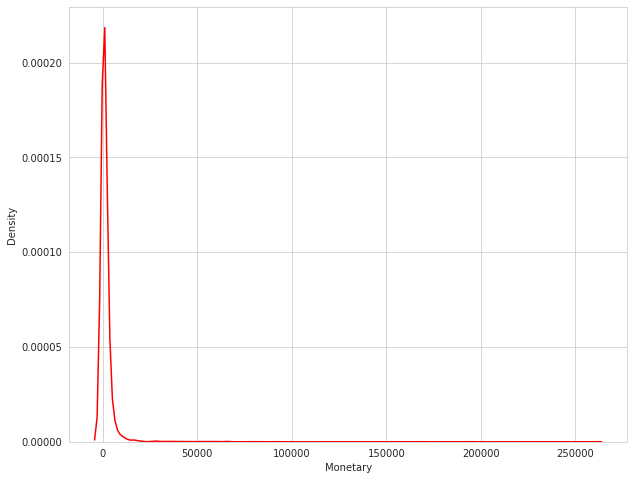

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 8))

# plotting  Monetory

sns.distplot(rfmData.Monetary, hist = False, color = 'r')

In [ ]:
#  dividing customers into 4 segments, to give RFM score

quantiles = rfmData.quantile(q = [0.25, 0.5, 0.75 ]) #using quantile function to get value of quantiles
quantiles = quantiles.to_dict() # coverting into dictionary for easier mapping 
quantiles

{'CustomerID': {0.25: 14208.25, 0.5: 15571.5, 0.75: 16913.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 101.0},
 'Monetary': {0.25: 293.025, 0.5: 641.98, 0.75: 1566.1275},
 'Recency': {0.25: 17.0, 0.5: 51.0, 0.75: 144.0}}

In [ ]:
# Now we will assign  R and FM score to each category and customers
def RScore(val, param):
    if val <= quantiles[param][0.25]:   return 1
    elif val <= quantiles[param][0.50]: return 2
    elif val <= quantiles[param][0.75]: return 3
    else: return 4

def FMScore(val, param):
    if val <= quantiles[param][0.25]:   return 4
    elif val <= quantiles[param][0.50]: return 3
    elif val <= quantiles[param][0.75]: return 2
    else: return 1

# here we have used same ranking method for Frequency and Monetary because higher their value higher they are loyal to company
# while in case of RECENCY lower the value of recency higher they are loyal to company.  

In [ ]:
rfmData['R'] = rfmData['Recency'].apply(lambda x : RScore(x, 'Recency')) # giving R score 
rfmData['F'] = rfmData['Frequency'].apply(lambda x : FMScore(x, 'Frequency')) # giving F score
rfmData['M'] = rfmData['Monetary'].apply(lambda x : FMScore(x, 'Monetary')) # giving M score

In [ ]:
rfmData.head(5)

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326,2,77183.60,4,4,1
1,12747.0,3,103,4196.01,1,1,1
2,12748.0,1,4642,33719.73,1,1,1
3,12749.0,4,231,4090.88,1,1,1
4,12820.0,4,59,942.34,1,2,2


In [ ]:
# addign new column for RFM Score
rfmData['Score'] = rfmData[['R', 'F', 'M']].sum(axis = 1)

#assigning membership based on scores
Membership = ['Platinum', 'Gold', 'Silver', 'Bronze'] 
rfmData['Membership'] = pd.qcut(rfmData.Score, q = 4, labels = Membership).values

rfmData.head(5)

,CustomerID,Recency,Frequency,Monetary,R,F,M,Score,Membership
0,12346.0,326,2,77183.60,4,4,1,9,Silver
1,12747.0,3,103,4196.01,1,1,1,3,Platinum
2,12748.0,1,4642,33719.73,1,1,1,3,Platinum
3,12749.0,4,231,4090.88,1,1,1,3,Platinum
4,12820.0,4,59,942.34,1,2,2,5,Platinum


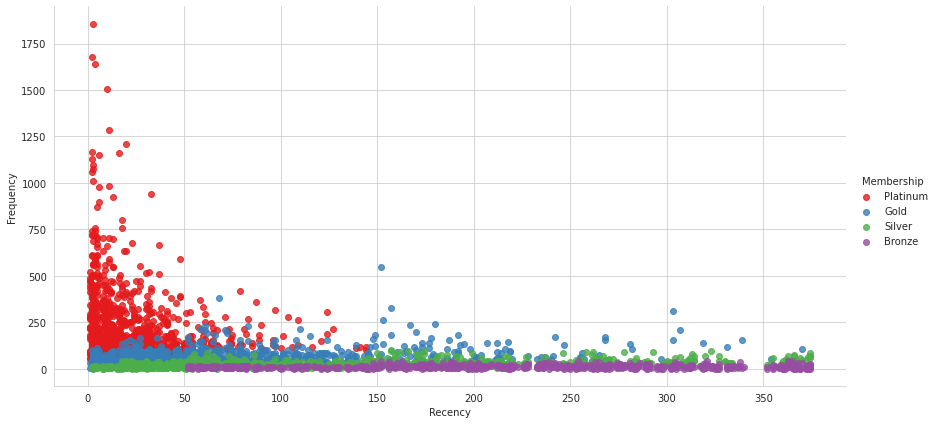

In [ ]:
dist = rfmData[rfmData.Frequency < 2000 ] # as most of the frequency value is less than 2000 

sns.lmplot(x = 'Recency', y = 'Frequency', hue = 'Membership', data = dist, palette = 'Set1', fit_reg = False, height = 6, aspect = 2) 

In [ ]:
#Normalization of data, as data was right skewed

import math

# training dataset which only contain 3 features of RFM for finding optimal value of K in Kmeans
XTrain = rfmData.iloc[:, [1, 2, 3]]

# now we will apply changes to the X_training dataset instead of the original RFM dataset
XTrain.Recency = rfmData.Recency.apply(lambda x : 0 if x == 0 else round(math.log(x), 3)) 
XTrain.Frequency = rfmData.Frequency.apply(lambda x : 0 if x == 0 else round(math.log(x), 3))
XTrain.Monetary = rfmData.Monetary.apply(lambda x : 0 if x == 0 else round(math.log(x), 3))

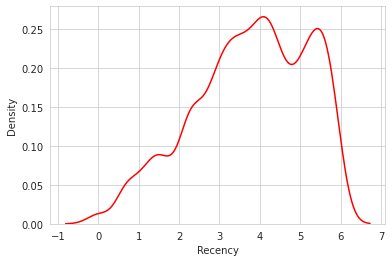

In [ ]:
sns.distplot(XTrain['Recency'], hist = False, color = 'r')

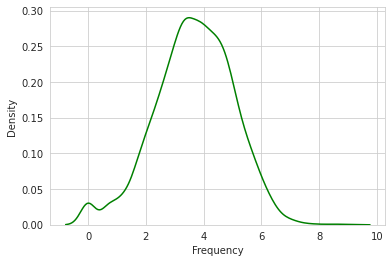

In [ ]:
sns.distplot(XTrain['Frequency'], hist = False, color = 'g')

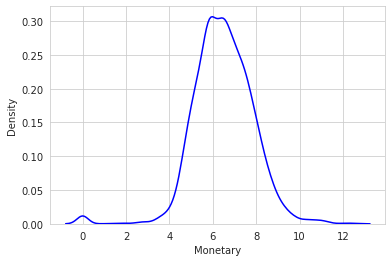

In [ ]:
sns.distplot(XTrain['Monetary'], hist = False, color = 'b')

In [ ]:
#Scaling Data

from sklearn.preprocessing import StandardScaler as scaler

sc = scaler() # create instance of Standardscaler

ScaledData = sc.fit_transform(XTrain) # applying transformation to X_train

ScaledData = pd.DataFrame(ScaledData, index = rfmData.index, columns = XTrain.columns) # changing into dataframe again

**Using elbow method to find optimalvalue of K in K means clustering**

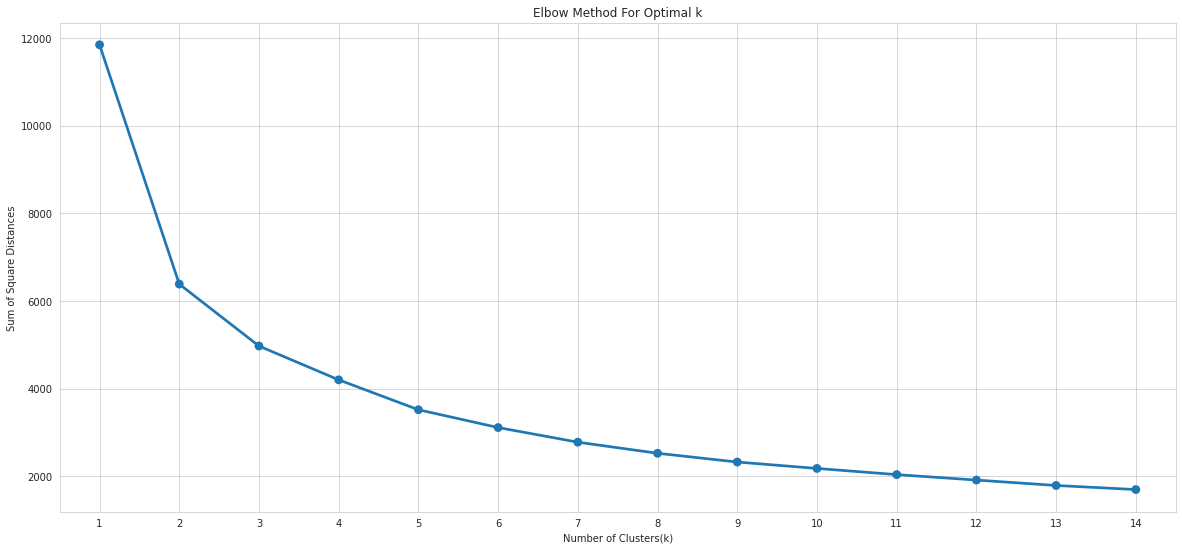

In [ ]:

from sklearn.cluster import KMeans

squareDist = [] # for storing square_distance after using Kmeans model
itr = [] # for storing iteration count 

for i in range(1, 15) : 
    model = KMeans(n_clusters = i, max_iter = 1000)
    model.fit(ScaledData)
    squareDist.append(model.inertia_)
    itr.append(i)

# now we will plot the graphical representaion of square distance and iterations
sns.set_style('whitegrid')
plt.figure(figsize = (20, 9))
sns.pointplot(itr, squareDist, col = 'b')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [ ]:
model = KMeans(n_clusters = 3, max_iter = 100000)

# fitting scaled dataset into our Kmeans Model
rfmData['cluster1'] = model.fit_predict(ScaledData)

# adding cluster variable to the RFM dataset to check membership level of customer. 
rfmData['Cluster'] = model.labels_ 

rfmData.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,Score,Membership,cluster1,Cluster
0,12346.0,326,2,77183.60,4,4,1,9,Silver,1,1
1,12747.0,3,103,4196.01,1,1,1,3,Platinum,2,2
2,12748.0,1,4642,33719.73,1,1,1,3,Platinum,2,2
3,12749.0,4,231,4090.88,1,1,1,3,Platinum,2,2
4,12820.0,4,59,942.34,1,2,2,5,Platinum,2,2
5,12821.0,215,6,92.72,4,4,4,12,Bronze,0,0
6,12822.0,71,47,948.88,3,2,2,7,Gold,1,1
7,12823.0,75,5,1759.50,3,4,1,8,Gold,0,0
8,12824.0,60,25,397.12,3,3,3,9,Silver,1,1
9,12826.0,3,94,1474.72,1,2,2,5,Platinum,2,2


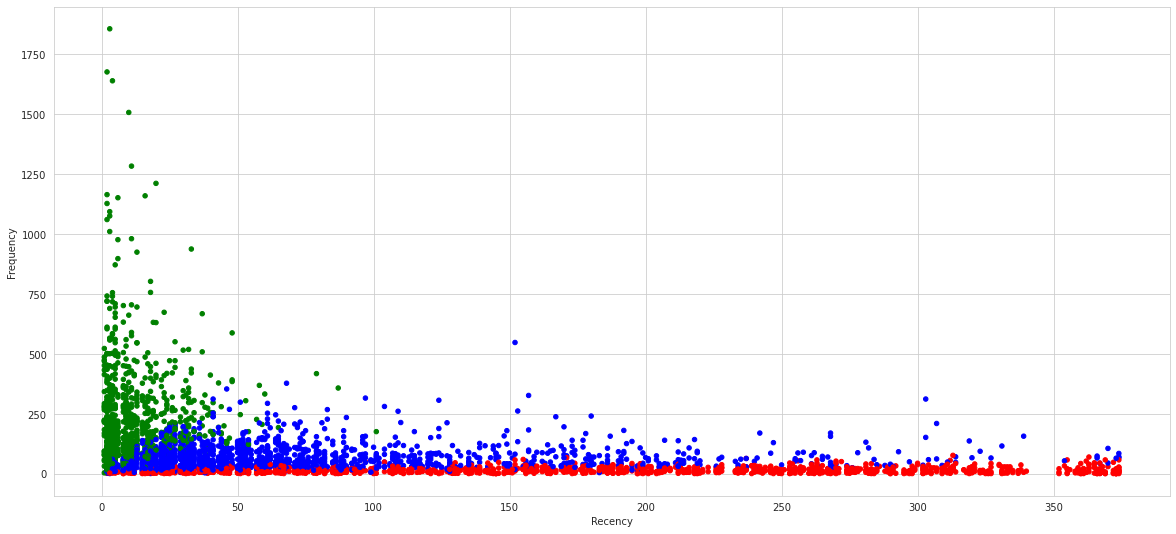

In [ ]:
rfmData['Colour'] = rfmData['Cluster'].apply(lambda x : 'Red' if x == 0 else ('Green' if x == 2 else 'Blue'))
dist = rfmData[rfmData.Frequency < 2000 ]
dist.plot(x = 'Recency', y = 'Frequency', kind = 'scatter', c = dist['Colour'], figsize = (20, 9))

In [ ]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score

print("Silhouette Coefficient: %0.3f" % silhouette_score(ScaledData, rfmData['Cluster']))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(ScaledData, rfmData['Cluster']))


Silhouette Coefficient: 0.298
Calinski-Harabasz Index: 2731.718
